#**CL-I (ML)**

Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Explained: 0.5540633835693527


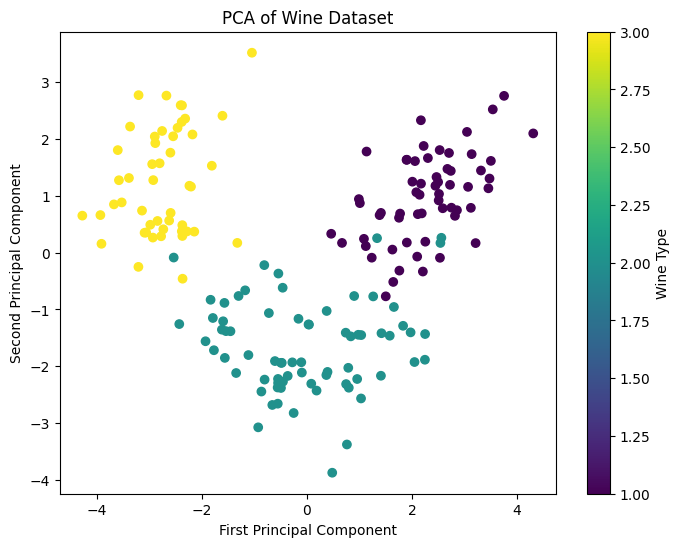

In [2]:
'''1.Feature Transformation: A. To use PCA Algorithm for dimensionality reduction. You have a dataset that includes measurements for different variables on wine (alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data so that most variations in the measurements of the variables are captured by a small number of principal components so that it is easier to distinguish between red and white wine by inspecting these principal components. Dataset Link: [https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv](https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv)'''

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Wine.csv')
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type')
plt.show()

In [4]:
'''2.Regression Analysis: A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks: 1. Pre-process the dataset. 2. Identify outliers. 3. Check the correlation. 4. Implement linear regression and ridge, Lasso regression models. 5. Evaluate the models and compare their respective scores like R2, RMSE.
Dataset link: [https://www.kaggle.com/datasets/yasserh/uber-fares-dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/uber.csv')

# 1. Preprocessing
df = df.dropna()
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
df = df[df['fare_amount'] < 100]

# Select features
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

# 2. Identify Outliers
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outliers = ((y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))).sum()
print(f"Number of outliers: {outliers}")

# 3. Check Correlation
print("\nCorrelation Matrix:")
print(df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
          'dropoff_latitude', 'passenger_count', 'fare_amount']].corr())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Implement Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 5. Evaluate Models
print("\nModel Performance:")
print("\nLinear Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")

print("\nRidge Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")

print("\nLasso Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")

Number of outliers: 3823

Correlation Matrix:
                   pickup_longitude  pickup_latitude  dropoff_longitude  \
pickup_longitude           1.000000        -0.933453           0.864234   
pickup_latitude           -0.933453         1.000000          -0.896379   
dropoff_longitude          0.864234        -0.896379           1.000000   
dropoff_latitude          -0.891976         0.958175          -0.937756   
passenger_count            0.004710        -0.006352           0.003833   
fare_amount                0.019970        -0.020038           0.019084   

                   dropoff_latitude  passenger_count  fare_amount  
pickup_longitude          -0.891976         0.004710     0.019970  
pickup_latitude            0.958175        -0.006352    -0.020038  
dropoff_longitude         -0.937756         0.003833     0.019084  
dropoff_latitude           1.000000        -0.006763    -0.020853  
passenger_count           -0.006763         1.000000     0.009919  
fare_amount         

Accuracy: 0.9861111111111112

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0

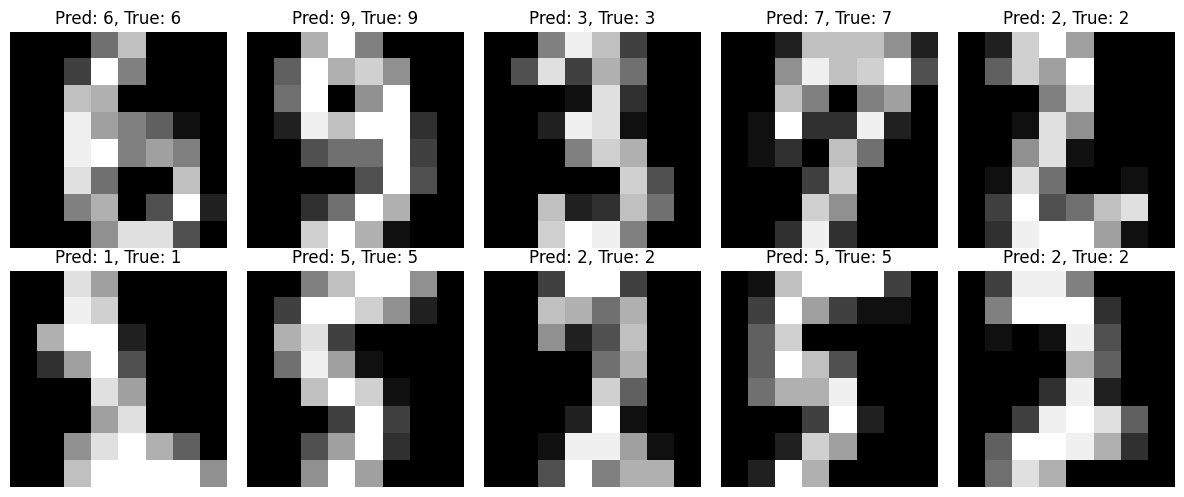

In [5]:
'''3. Classification Analysis : A. Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9).'''

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

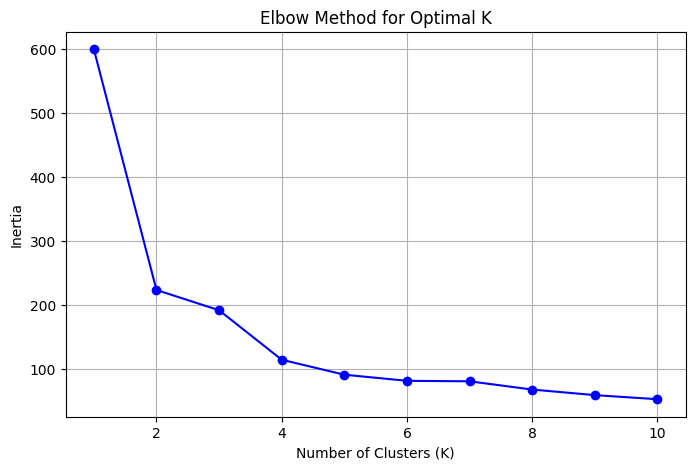

Cluster Centers:
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]

Cluster Distribution:
Cluster
0    96
1    32
2    22
Name: count, dtype: int64


In [7]:
'''4. Clustering Analysis : A. Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method. Dataset Link: [https://www.kaggle.com/datasets/uciml/iris](https://www.kaggle.com/datasets/uciml/iris)'''

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Iris.csv')
X = df.drop(['Id', 'Species'], axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine optimal clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Apply K-Means with optimal clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

In [10]:
'''5. Ensemble Learning : A. Implement Random Forest Classifier model to predict the safety of the car. Dataset link: [https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
# Define column names as the dataset does not have a header
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('/car_evaluation.csv', header=None, names=column_names)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nFeature Importance:")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9739884393063584

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346


Confusion Matrix:
[[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]

Feature Importance:
buying: 0.1901
maint: 0.1622
doors: 0.0676
persons: 0.2184
lug_boot: 0.0856
safety: 0.2761


In [11]:
'''6. Reinforcement Learning : A. Implement Reinforcement Learning using an example of a maze environment that the agent needs to explore.'''

import numpy as np
import matplotlib.pyplot as plt

# Define maze environment
maze = np.array([
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0]
])

# Parameters
start = (0, 0)
goal = (4, 4)
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000

# Initialize Q-table
Q = np.zeros((5, 5, 4))

# Q-Learning algorithm
for episode in range(episodes):
    state = start

    while state != goal:
        # Choose action (epsilon-greedy)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(Q[state[0], state[1], :])

        # Take action
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])

        # Check if next state is valid
        if (0 <= next_state[0] < 5 and 0 <= next_state[1] < 5 and
            maze[next_state[0], next_state[1]] == 0):

            # Reward
            reward = 100 if next_state == goal else -1

            # Update Q-value
            Q[state[0], state[1], action] = Q[state[0], state[1], action] + \
                alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1], :]) -
                        Q[state[0], state[1], action])

            state = next_state
        else:
            # Penalty for hitting wall
            Q[state[0], state[1], action] = Q[state[0], state[1], action] - 10

# Extract learned policy
policy = np.argmax(Q, axis=2)
print("Learned Policy (0=Up, 1=Down, 2=Left, 3=Right):")
print(policy)

# Visualize maze and path
path = [start]
state = start
while state != goal:
    action = policy[state[0], state[1]]
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if (0 <= next_state[0] < 5 and 0 <= next_state[1] < 5 and
        maze[next_state[0], next_state[1]] == 0):
        state = next_state
        path.append(state)
    else:
        break

print("\nPath from start to goal:", path)

Learned Policy (0=Up, 1=Down, 2=Left, 3=Right):
[[3 3 1 0 1]
 [1 0 1 0 1]
 [1 0 3 3 1]
 [3 1 0 0 1]
 [0 3 3 3 0]]

Path from start to goal: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


#**CL-I (DMV)**

In [ ]:
'''
#1 Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API Dataset: Weather data retrieved from OpenWeatherMap API Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data for a specific location and perform data modeling and visualization to analyze weather patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent formats.
5. Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.'''

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Get API key from OpenWeatherMap
API_KEY = "your_api_key_here"
CITY = "London"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# Fetch weather data
params = {
    'q': CITY,
    'appid': API_KEY,
    'units': 'metric'
}

response = requests.get(BASE_URL, params=params)
data = response.json()

# Extract relevant attributes
weather_data = {
    'Temperature': data['main']['temp'],
    'Humidity': data['main']['humidity'],
    'Wind_Speed': data['wind']['speed'],
    'Pressure': data['main']['pressure'],
    'Description': data['weather'][0]['description']
}

# Create DataFrame
df = pd.DataFrame([weather_data])
print("Weather Data:")
print(df)

# Clean and preprocess
df.fillna(method='ffill', inplace=True)

# Data modeling - Calculate statistics
print("\nWeather Statistics:")
print(f"Average Temperature: {df['Temperature'].mean():.2f}°C")
print(f"Max Humidity: {df['Humidity'].max()}%")
print(f"Min Wind Speed: {df['Wind_Speed'].min()} m/s")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Temperature plot
axes[0, 0].bar(['Temperature'], [df['Temperature'].values[0]], color='red')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_title('Current Temperature')

# Humidity plot
axes[0, 1].bar(['Humidity'], [df['Humidity'].values[0]], color='blue')
axes[0, 1].set_ylabel('Humidity (%)')
axes[0, 1].set_title('Current Humidity')

# Wind Speed plot
axes[1, 0].bar(['Wind Speed'], [df['Wind_Speed'].values[0]], color='green')
axes[1, 0].set_ylabel('Wind Speed (m/s)')
axes[1, 0].set_title('Current Wind Speed')

# Pressure plot
axes[1, 1].bar(['Pressure'], [df['Pressure'].values[0]], color='orange')
axes[1, 1].set_ylabel('Pressure (hPa)')
axes[1, 1].set_title('Current Pressure')

plt.tight_layout()
plt.show()

# Correlation heatmap
import seaborn as sns
numeric_df = df[['Temperature', 'Humidity', 'Wind_Speed', 'Pressure']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Weather Attributes Correlation')
plt.show()

In [ ]:
'''
#2 Data Cleaning and Preparation
Problem Statement: Analyzing Customer Churn in a Telecommunications Company Dataset: "Telecom_Customer_Churn.csv"
Description: The dataset contains information about customers of a telecommunications company and whether they have churned (i.e., discontinued their services). The dataset includes various attributes of the customers, such as their demographics, usage patterns, and account information. The goal is to perform data cleaning and preparation to gain insights into the factors that contribute to customer churn.
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy. 4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations, and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to predicting customer churn.
9. Normalize or scale the data if necessary
10. Split the dataset into training and testing sets for further analysis. 11. Export the cleaned dataset for future analysis or modeling.'''

In [ ]:
'''
#3 Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate market. It includes various attributes such as property characteristics, location, sale prices, and other relevant features. The goal is to perform data wrangling to gain insights into the factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., imputation or removal).
3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process.'''


In [ ]:
'''
#4 Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5, PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library to create visualizations that effectively represent the AQI trends and patterns for different pollutants in the city.
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color schemes.'''

In [ ]:
'''
#5 Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company Dataset: "Retail_Sales_Data.csv"
Description: The dataset contains information about sales transactions in a retail company. It includes attributes such as transaction date, product category, quantity sold, and sales amount. The goal is to perform data aggregation to analyze the sales performance by region and identify the top-performing regions.
Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories. '''


In [ ]:
'''
#6 Time Series Data Analysis
Problem statement: Analysis and Visualization of Stock Market Data Dataset: "Stock_Prices.csv"
Description: The dataset contains historical stock price data for a particular company over a period of time. It includes attributes such as date, closing price, volume, and other relevant features. The goal is to perform time series data analysis on the stock price data to identify trends, patterns, and potential predictors, as well as build models to forecast future stock prices. Tasks to Perform:
1. Import the "Stock_Prices.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over time.
5. Calculate and plot moving averages or rolling averages to identify the underlying trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential smoothing models to forecast future stock prices.'''